<h1> Music genre prediction [M1_27DS+] </h1>  
<style>
h1 {
  border: dashed white;
  padding: 10px 12px;
  background-color: indigo;
  position: static;
}
</style>

## Table of contents
* [1. Описание проекта. Подготовка к работе.](#chapter1)
    * [1.1 Загрузка данных и библиотек](#section1_1)
    * [1.2 Настройка окружения](#section1_2)
    * [1.3 Инициализация и описание функций](#section1_3)
* [2. Предобработка данных](#chapter2)
    * [2.1 Дубликаты и пропуски](#section_2_1)
* [3. Исследовательский анализ данных](#chapter3)
    * [3.1 Столбец acousticness](#section3_1)
    * [3.2 Столбец duration_ms](#section3_2)
    * [3.3 Столбец energy](#section3_3)
    * [3.4 Столбец instrumentalness](#section3_4)
    * [3.5 Столбец liveness](#section3_5)
    * [3.6 Столбец loudness](#section3_6)
    * [3.7 Столбец speechiness](#section3_7)
    * [3.8 Столбец tempo](#section3_8)
    * [3.9 Столбец valence](#section3_9)
    * [3.10 Столбец popularity](#section3_10)

* [4. ](#chapter4)
* [5. Общий вывод](#chapter5)
* [Чеклист](#chapter_checklist)

In [119]:
### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="chapter1.1"></a>

#### Section 1.2 <a class="anchor" id="chapter1.2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

## 1. Описание проекта. Подготовка к работе. <a class="anchor" id="chapter1"></a>
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". \
Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. \
Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. \
### Задача:
Разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### План работы:
1. Загрузка данных, настройка среды и функций;
2. Предобработка;
3. Исследовательский анализ данных;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков.

### Данные
* **train.csv** - информация (40000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* **test.csv** - информация (10000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* **sample_submit.csv** - файл предсказаний в правильном формате.


#### Описание полей данных
* `instance_id` -Уникальный идентификатор трека
* `track_name` - Название трека
* `popularity` - Популярность трека
* `acousticness` - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* `danceability` - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* `duration_ms` - Продолжительность трека в миллисекундах.
* `energy` - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* `instrumentalness` - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* `key` - базовый ключ (нота) произведения
* `liveness` - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* `loudness` - Общая громкость трека в децибелах (дБ)
* `mode` - Указывает на модальность (мажорную или минорную) трека
* speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* `tempo` - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* `obtained_date` - дата загрузки в сервис
* `valence` - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* `music_genre` - Музыкальный жанр трека. Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Загрузка библиотек <a class="anchor" id="section1_1"></a>

In [120]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

### Настройка окружения 

In [121]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

### Инициализация функций

In [122]:
# функция информации по таблице
def dataframe_summary(df, string):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    # Вывод статистического описания
    print("\n Статистическое описание:")
    display(df.describe().transpose())

    # Вывод случайных примеров
    print("\nСлучайные примеры:")
    display(df.sample(5))

    # Вывод количества строк и столбцов
    print("\nКоличество строк и столбцов:", df.shape)
    
    # Вывод количества явных дубликатов
    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    print('')

In [123]:
# функция поиска пропусков
def analyze_missing_values(dataframes, names):
    for i, df in enumerate(dataframes):
        # Подсчет количества и процента пропущенных значений
        total = df.isnull().sum().sort_values(ascending=False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data.query('Total > 0')

        # Вывод информации о пропусках
        print(f"Пропуски в датафрейме {names[i]}:\n{missing_data}\n")

        # Создание и отображение тепловой карты
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f"Heatmap пропусков для {names[i]}")
        plt.show()

In [164]:
# функция описательной статистики числового признака
def descriptive_stats_and_plot(df, numeric_column):
    if numeric_column not in df.columns:
        print(f"Столбец '{numeric_column}' не найден в DataFrame.")
        return

    # Описательная статистика
    descriptive_stats = df.groupby('music_genre')[numeric_column].describe()
    display(f"Описательная статистика для {numeric_column}:", descriptive_stats)

    # Визуализация распределения
    plt.figure(figsize=(12, 15))
    sns.violinplot(x=numeric_column, y='music_genre', data=df, split=True, inner='quart')

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    plt.show()

In [125]:
def fill_na_with_genre_median(df, numeric_column):
    # Вычисление медианы для каждого жанра
    median_per_genre = df.groupby('music_genre')[numeric_column].median()

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return median_per_genre[row['music_genre']]
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = df.apply(fill_na, axis=1)

In [126]:
def fill_na_with_quantile(df, numeric_column):
    # Вычисление 25-го и 75-го квартилей для указанной числовой переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[numeric_column].quantile([0.25, 0.75]).unstack()

    # Переименование колонок
    quantile_table.columns = ['percentile_25', 'percentile_75']

    # Сброс индекса, чтобы 'music_genre' стал колонкой
    quantile_table.reset_index(inplace=True)

    # Объединение с исходным DataFrame
    merged = df.merge(quantile_table, on='music_genre', how='left')

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return np.random.uniform(row['percentile_25'], row['percentile_75'])
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = merged.apply(fill_na, axis=1)

### Загрузка данных 

In [127]:
file_names = {
    'train': 'train.csv',
    'test': 'test.csv',
    'train_ad': 'train_addition.csv'
}

# Загрузка каждого файла в соответствующую переменную
for variable, file_name in file_names.items():
    globals()[variable] = pd.read_csv(file_name)

file_names = list(file_names.keys())

In [128]:
train = train
test = test
train_ad = train_ad
dataframes = [train , test]
# Размер до удаления данных в train
initial_size = train.shape[0]

In [129]:
for item in range(len(file_names)):
    print(f'Размер таблицы {file_names[item], globals()[file_names[item]].shape}')
    print(f'Пропусков {globals()[file_names[item]].isnull().any(axis=1).sum()}')

Размер таблицы ('train', (40000, 17))
Пропусков 20609
Размер таблицы ('test', (10000, 16))
Пропусков 5122
Размер таблицы ('train_ad', (20394, 16))
Пропусков 1640


In [130]:
dataframe_summary(train, 'train')
dataframe_summary(test, 'test')

Общая информация по таблице: train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music

,count,mean,std,min,25%,50%,75%,max
instance_id,"40,000.00","25,959.01","14,443.71","1,000.00","13,414.75","25,949.50","38,496.25","50,999.00"
popularity,"36,078.00",44.18,15.55,0.00,34.00,45.00,56.00,99.00
acousticness,"40,000.00",0.31,0.34,0.00,0.02,0.14,0.55,1.00
danceability,"37,963.00",0.56,0.18,0.06,0.44,0.57,0.69,0.98
duration_ms,"40,000.00","221,322.07","129,736.74",-1.00,"174,849.75","219,320.00","268,667.00","4,830,606.00"
energy,"40,000.00",0.60,0.27,0.00,0.43,0.64,0.81,1.00
instrumentalness,"40,000.00",0.18,0.33,0.00,0.00,0.00,0.16,0.99
liveness,"40,000.00",0.19,0.16,0.01,0.10,0.13,0.24,1.00
loudness,"40,000.00",-11.68,14.43,-110.95,-11.62,-7.48,-5.26,3.74
speechiness,"40,000.00",0.13,0.21,0.02,0.04,0.05,0.11,1.82



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
21429,37262,Who Loves The Sun - 2015 Remastered,53.00,0.33,0.44,"166,213.00",0.57,0.00,NaN,0.37,-8.83,Major,0.03,130.131,4-Apr,0.72,Rock
16902,2722,Pogo People,31.00,0.00,0.63,"253,761.00",0.97,0.09,F#,0.38,-3.65,Minor,0.18,?,NaN,0.15,Electronic
24510,14892,Outstanding Velvet Spirit,37.00,0.98,0.63,"83,076.00",0.10,0.91,E,0.11,-22.87,Major,0.05,78.813,3-Apr,0.59,Jazz
5275,32297,The Night They Drove 'Ol Dixie Down,32.00,0.21,0.40,-1.00,0.73,0.00,C,0.83,-7.10,Major,0.08,115.289,4-Apr,0.21,Blues
3643,20067,Tremble,NaN,0.02,0.44,"238,547.00",0.53,0.00,C,0.10,-6.08,Minor,0.04,147.735,NaN,0.24,Alternative



Количество строк и столбцов: (40000, 17)

Количество явных дубликатов: 0

Общая информация по таблице: test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7388 non-null   object 
 2   popularity        8987 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9477 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9673 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9518 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8419 non

,count,mean,std,min,25%,50%,75%,max
instance_id,"10,000.00","26,161.46","14,394.19","1,008.00","13,839.75","26,174.00","38,503.50","50,993.00"
popularity,"8,987.00",44.39,15.53,0.00,34.00,45.00,56.00,90.00
acousticness,"10,000.00",0.30,0.34,0.00,0.02,0.14,0.54,1.00
danceability,"9,477.00",0.56,0.18,0.06,0.45,0.57,0.69,0.99
duration_ms,"10,000.00","220,974.73","124,327.61",-1.00,"174,620.75","219,213.00","268,294.50","2,764,934.00"
energy,"10,000.00",0.60,0.26,0.00,0.44,0.65,0.82,1.00
instrumentalness,"10,000.00",0.18,0.32,0.00,0.00,0.00,0.14,1.00
liveness,"10,000.00",0.20,0.16,0.02,0.10,0.13,0.25,0.99
loudness,"10,000.00",-11.54,14.42,-102.97,-11.28,-7.37,-5.20,1.89
speechiness,"10,000.00",0.13,0.21,0.02,0.04,0.05,0.12,1.65



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
5078,14862,Occasional Magic,43.00,0.00,0.52,"257,627.00",0.83,0.85,C#,0.10,-7.18,Minor,0.04,91.97399999999999,4-Apr,0.22
3107,47734,2 Reasons (feat. T.I.),52.00,0.00,0.73,"197,627.00",0.75,0.00,B,0.18,-5.09,Major,0.08,94.03299999999999,4-Apr,0.54
1942,46999,NaN,NaN,0.01,NaN,-1.00,0.63,0.00,A#,0.14,-8.77,Minor,1.49,192.733,3-Apr,0.56
8137,7693,NaN,41.00,0.08,0.57,"300,134.00",0.81,0.00,F,0.16,-4.17,Major,0.03,112.021,NaN,0.49
7749,14956,Spark,34.00,0.00,0.50,-1.00,0.96,0.76,B,0.51,-3.96,Minor,0.09,?,4-Apr,0.34



Количество строк и столбцов: (10000, 16)

Количество явных дубликатов: 0



* В обоих таблицах по 16 колонок с features-признаками;
* В таблице train также присутсвует 17ая колонка с target-признаком;
* В данных присутсвуют пропуски. В таблице train больше всего строчек с пропусками, подробнее обработаем пропуски далее;
* В данных присутсвуют аномалии, например, `duration_ms` может принимать значение *-1*, запомним это;
* Не везде правильный тип данных, например, `obtained_date` относится к дате, но формат таковой не имеет, а `duration_ms` имеет тип **float** вместо **int**;
* Также из-за пропусков целочисленная переменная `popularity` имеет тип **float** вместо **int**;
* Возможно, присутвуют дубликаты в данных, необходимо проверить без колонок 	`instance_id` и	`track_name`.

## 2. Предобработка данных <a class="anchor" id="chapter2"></a>

### Пропуски

Пропуски в датафрейме train:
               Total  Percent
track_name     10738    26.85
obtained_date   6219    15.55
popularity      3922     9.80
danceability    2037     5.09
mode            1853     4.63
key             1423     3.56



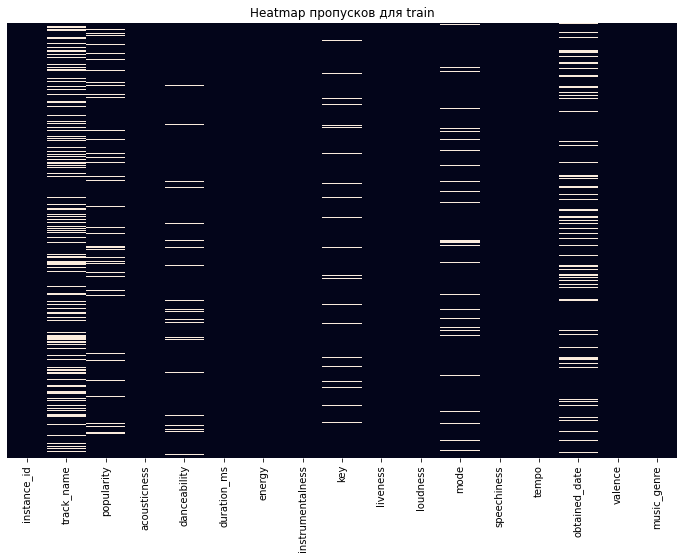

Пропуски в датафрейме test:
               Total  Percent
track_name      2612    26.12
obtained_date   1581    15.81
popularity      1013    10.13
danceability     523     5.23
mode             482     4.82
key              327     3.27



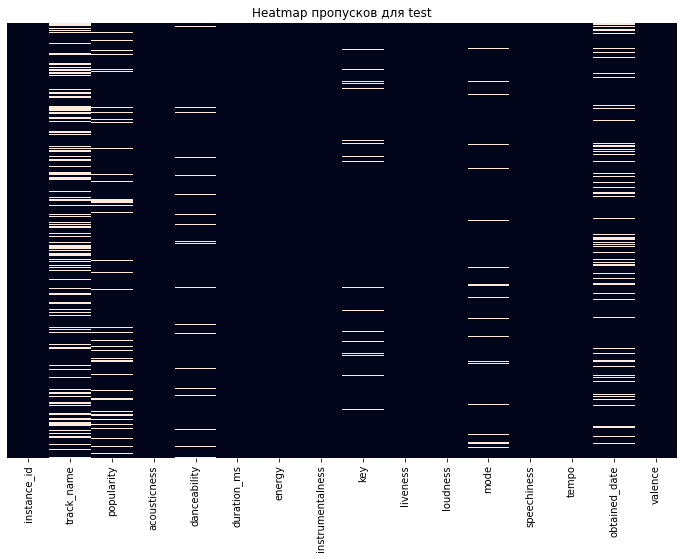

In [131]:
analyze_missing_values(dataframes, ['train', 'test'])

* Несмотря на большое наличие пропусков, данные отсутсвуют лишь в 6 столбцах: `track_name`, `obtained_date`, `popularity`, `danceability`, `mode`, `key`;
* Больше всего пропусков в столбцах `track_name` и `obtained_date` от 15% до 26% от общего кол-ва строк;
* У меня есть предположение, что пропуски могут быть связаны. Думаю, что треки имеющие пропуск в одной переменной, скорее всего имеют другие параметры не заполнеными;
* Построим матрицу корреляции пропусков.

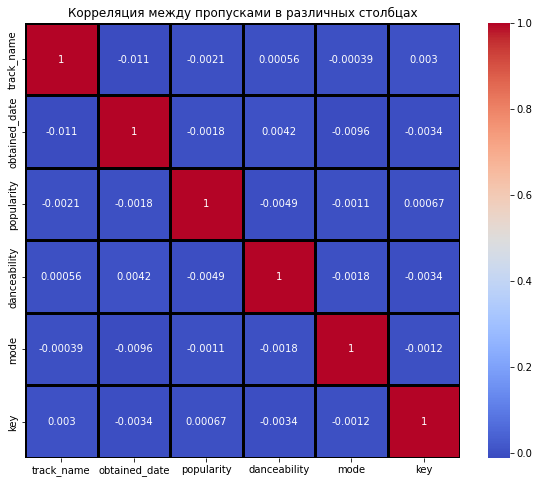

In [132]:
# Создание булевой матрицы пропусков
missing_bool = train[['track_name', 'obtained_date', 'popularity', 'danceability', 'mode', 'key']].isnull()

# Вычисление корреляции между столбцами булевой матрицы
corr = missing_bool.corr(method='pearson')  # Или использовать другой метод корреляции

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', square=True)
plt.title('Корреляция между пропусками в различных столбцах')
plt.show()

* Корреляции между пропусками, к сожалению или к счастью, не наблюдается.
* Поэтапно обработаем пропуски.

#### Пропуски в `popularity`, `danceability`, `mode`, `key`

Столбец `popularity` имеет **9.80%** пропусков от общего числа данных. Это достаточно много, поэтому перед удалением, проверим, можно ли заполнить пропуски.

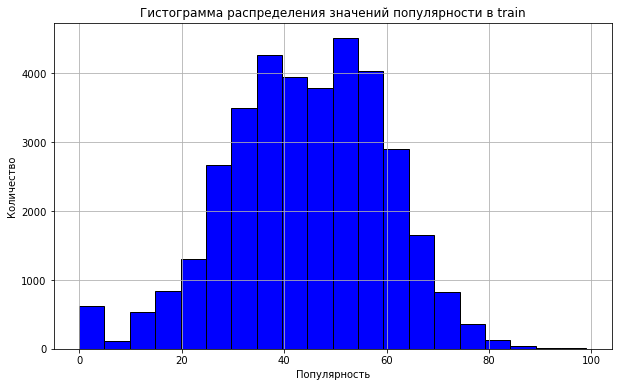

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(train['popularity'], bins=20, color='blue', edgecolor='black')
plt.title('Гистограмма распределения значений популярности в train')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

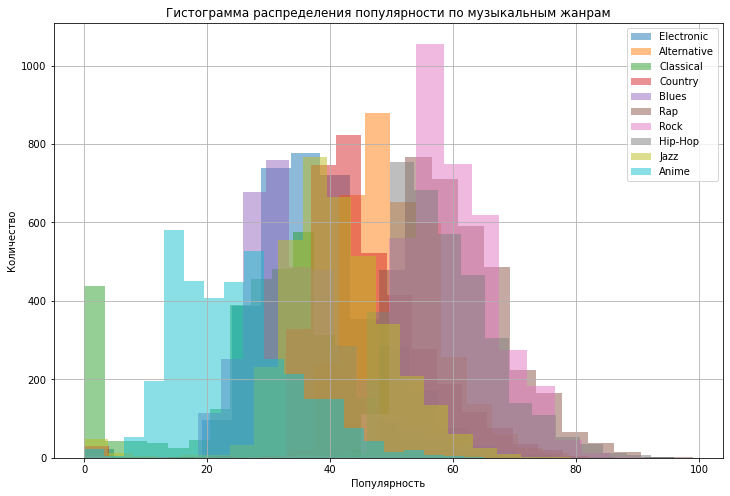

In [134]:
# Уникальные жанры
genres = train['music_genre'].unique()

# Гистограмма для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Наблюдается зависимость популярности от жанра музыки. Центр распределения каждой гистограммы смещен вправо или влево по шкале популярности. Таким образом, пропуски в столбце `popularity` можно заполнить на основе среднего значения популярности для каждого жанра.

In [135]:
fill_na_with_genre_median(train, 'popularity')
# Проверка, что пропуски были заполнены
print(f'Пропусков в столбце popularity: {train["popularity"].isnull().sum()}')

Пропусков в столбце popularity: 0


Посмотрим на распределение популярности жанров после заполнения пропусков.

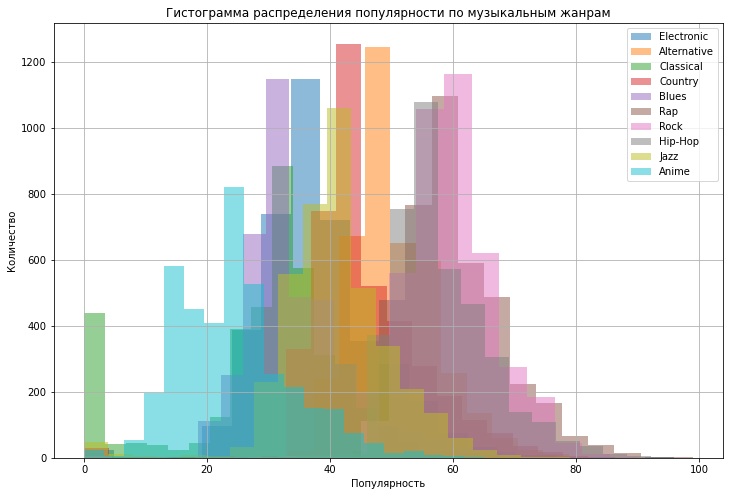

In [136]:
genres = train['music_genre'].unique()    
# Создание гистограмм для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Очевидно, что выросли пики связанные с медианным значением каждого жанра. В принципе, можно считать заполнение пропусков удачным в данном случае.


Проверим столбец `danceability`, там тоже моного пропусков.

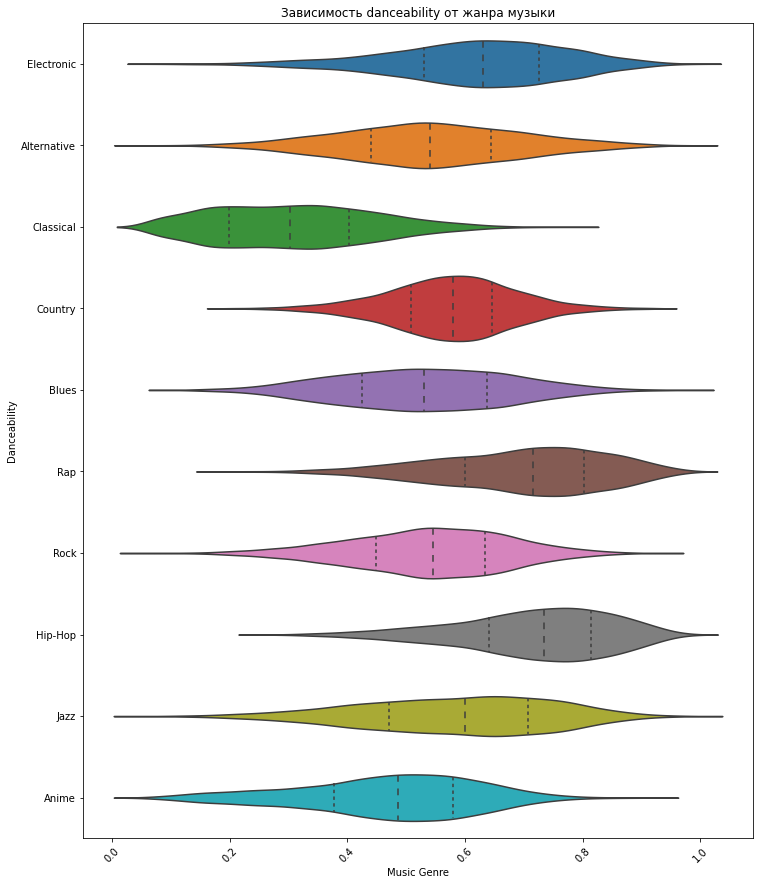

In [137]:
plt.figure(figsize=(12, 15))
sns.violinplot(x='danceability', y='music_genre', data=train,split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Зависимость danceability от жанра музыки')
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.show()

Так как `danceability` - непрерывная велечина, предлагаю пропуски заменять на случайное число лежащее в пределах 50% распределения значений `danceability` для каждого жанра.\
Границы Q1 (25%) и Q3 (75%)

In [138]:
# Вычисление 25-го и 75-го квартилей для 'danceability' по каждому жанру
quantile_table = train.groupby('music_genre')['danceability'].quantile([0.25, 0.75]).unstack()

# Переименование колонок
quantile_table.columns = ['percentile_25', 'percentile_75']

# Сброс индекса, чтобы 'music_genre' стал колонкой
quantile_table.reset_index(inplace=True)

# Выводим результат
display(quantile_table)

,music_genre,percentile_25,percentile_75
0,Alternative,0.44,0.65
1,Anime,0.38,0.58
2,Blues,0.42,0.64
3,Classical,0.20,0.40
4,Country,0.51,0.65
5,Electronic,0.53,0.73
6,Hip-Hop,0.64,0.81
7,Jazz,0.47,0.71
8,Rap,0.60,0.80
9,Rock,0.45,0.63


In [139]:
print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 2037


In [140]:
fill_na_with_quantile(train, 'danceability')

print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 0


Столбцы `key` и `mode`

Пропущенных данных в этих столбцах мало, менее 5%. Можно смело очистить строки с пропусками.

In [141]:
# Удаление строк
train = train.dropna(subset=['mode', 'key'])

# Размер после удаления
final_size = train.shape[0]

# Расчет и вывод потерь в процентах
loss_percent = ((initial_size - final_size) / initial_size) * 100

print(f"Размер до: {initial_size}")
print(f"Размер после: {final_size}")
print(f"Потеряно данных: {loss_percent:.2f}%")

Размер до: 40000
Размер после: 36788
Потеряно данных: 8.03%


#### Пропуски в `track_name` и `obtained_date`

In [142]:
print(f'Кол-во уникальных названий треков в таблице train {len(train.track_name.unique())}')
print(f'Кол-во уникальных названий треков в таблице test {len(test.track_name.unique())}')

Кол-во уникальных названий треков в таблице train 24119
Кол-во уникальных названий треков в таблице test 7124


In [143]:
print(f'Уникальные даты загрузки треков в таблице train {train.obtained_date.unique()}')
print(f'Уникальные даты загрузки треков в таблице test {test.obtained_date.unique()}')

Уникальные даты загрузки треков в таблице train ['4-Apr' nan '5-Apr' '3-Apr' '1-Apr' '0/4']
Уникальные даты загрузки треков в таблице test ['4-Apr' '3-Apr' nan '5-Apr' '1-Apr']


* Оставим пропуски в этих переменных, тк они не пригодятся нам для анализа.
  * `track_name` уникальна, у нее отсутсвует обобщаемость (как и у `instance_id`), которая могла бы помочь в предсказании жанра;
  * `obtainde_date` может не иметь прямого влияния на жанр трека. Так, у нас присутсвуют данные только за арпель, поэтому если в новых данных будут другие даты, модель не сможет правильно экстраполировать полученный результат.

### Дубликаты

In [144]:
dub_df = train.drop(['instance_id', 'track_name', 'obtained_date'], axis=1)
print('Всего дубликатов строк: ',dub_df.duplicated().sum())

Всего дубликатов строк:  1


Бывает, посмотрим на эту парочку

In [145]:
# Найдем индексы дубликатов
duplicates = dub_df.duplicated(keep=False)
duplicate_indices = dub_df[duplicates].index
display(train.loc[duplicate_indices])

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
13576,2161,Sunspot (B-Sides),23.00,0.28,0.70,"409,400.00",0.39,0.88,C,0.11,-13.73,Major,0.04,87.694,4-Apr,0.59,Electronic
32962,3277,NaN,23.00,0.28,0.70,"409,400.00",0.39,0.88,C,0.11,-13.73,Major,0.04,87.694,4-Apr,0.59,Electronic


Оставим как есть, пусть живет!

In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36788 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       36788 non-null  int64  
 1   track_name        26921 non-null  object 
 2   popularity        36788 non-null  float64
 3   acousticness      36788 non-null  float64
 4   danceability      36788 non-null  float64
 5   duration_ms       36788 non-null  float64
 6   energy            36788 non-null  float64
 7   instrumentalness  36788 non-null  float64
 8   key               36788 non-null  object 
 9   liveness          36788 non-null  float64
 10  loudness          36788 non-null  float64
 11  mode              36788 non-null  object 
 12  speechiness       36788 non-null  float64
 13  tempo             36788 non-null  object 
 14  obtained_date     31035 non-null  object 
 15  valence           36788 non-null  float64
 16  music_genre       36788 non-null  object

### Вывод по итогам предобработки

* Избавились от всех пропусков потеряли всего 4.63%;
* В `popularity` заполнили пропуски медианным значением;
* В `danceability` заполнили пропуски случайным значением лежащим в пределах 50% выборки для каждого жанра.
* Пропуски в `mode` и `key` были удалены из-за их малого кол-ва.

## 3. Исследовательский анализ <a class="anchor" id="chapter3"></a>

### Столбец `popularity`

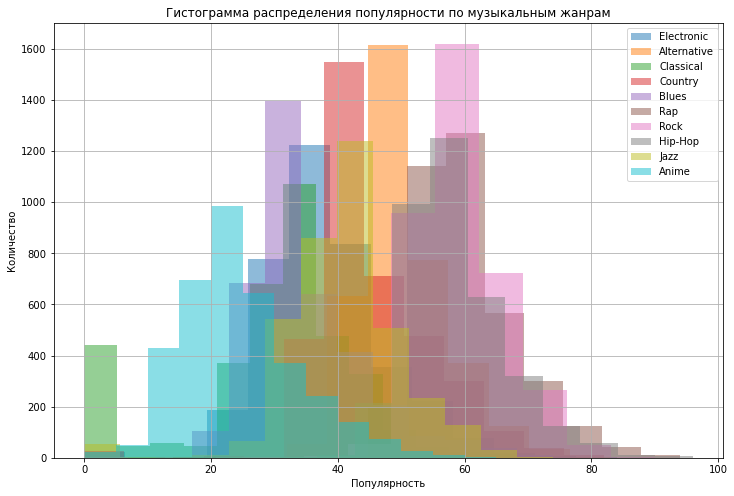

'Описательная статистика для popularity:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",50.29,7.23,0.00,46.00,49.00,54.00,83.00
Anime,"3,694.00",24.10,9.13,0.00,17.00,23.00,29.00,65.00
Blues,"3,671.00",34.64,9.18,0.00,29.00,33.00,38.00,74.00
Classical,"3,706.00",29.56,13.42,0.00,26.00,32.00,37.00,68.00
Country,"3,694.00",45.77,9.21,0.00,40.00,44.00,51.00,82.00
Electronic,"3,732.00",38.02,9.33,0.00,32.00,37.00,43.00,84.00
Hip-Hop,"3,626.00",58.22,7.92,19.00,52.00,57.00,63.00,96.00
Jazz,"3,691.00",40.75,9.10,0.00,36.00,40.00,45.00,74.00
Rap,"3,662.00",60.44,7.84,14.00,55.00,59.00,65.00,94.00


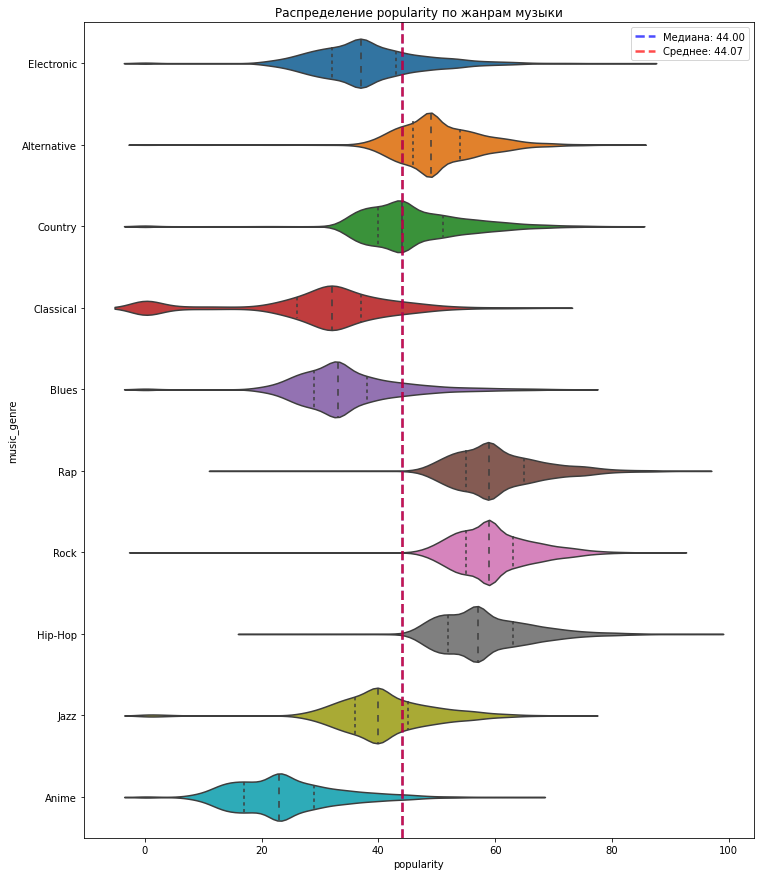

In [147]:
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=13, label=genre, alpha=0.5)
plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()
descriptive_stats_and_plot(train, 'popularity')

* Видна зависимость популярности трека от его жанра;
* Нет критичных выбросов или ошибочных, пропущенных значений;
* Изменим тип столбца на *Int*.

In [148]:
train['popularity'] = train['popularity'].astype(int)

In [149]:
# проверим тип столбца
print(train['popularity'].dtypes)

int32


### Столбец `acousticness`

'Описательная статистика для acousticness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",0.16,0.24,0.00,0.00,0.03,0.24,0.98
Anime,"3,694.00",0.29,0.37,0.00,0.01,0.07,0.61,1.00
Blues,"3,671.00",0.32,0.31,0.00,0.04,0.22,0.56,0.99
Classical,"3,706.00",0.87,0.26,0.00,0.91,0.97,0.99,1.00
Country,"3,694.00",0.27,0.26,0.00,0.05,0.18,0.43,0.98
Electronic,"3,732.00",0.12,0.20,0.00,0.00,0.03,0.14,0.98
Hip-Hop,"3,626.00",0.18,0.19,0.00,0.03,0.11,0.27,0.98
Jazz,"3,691.00",0.49,0.34,0.00,0.15,0.50,0.82,1.00
Rap,"3,662.00",0.17,0.19,0.00,0.02,0.09,0.26,0.94


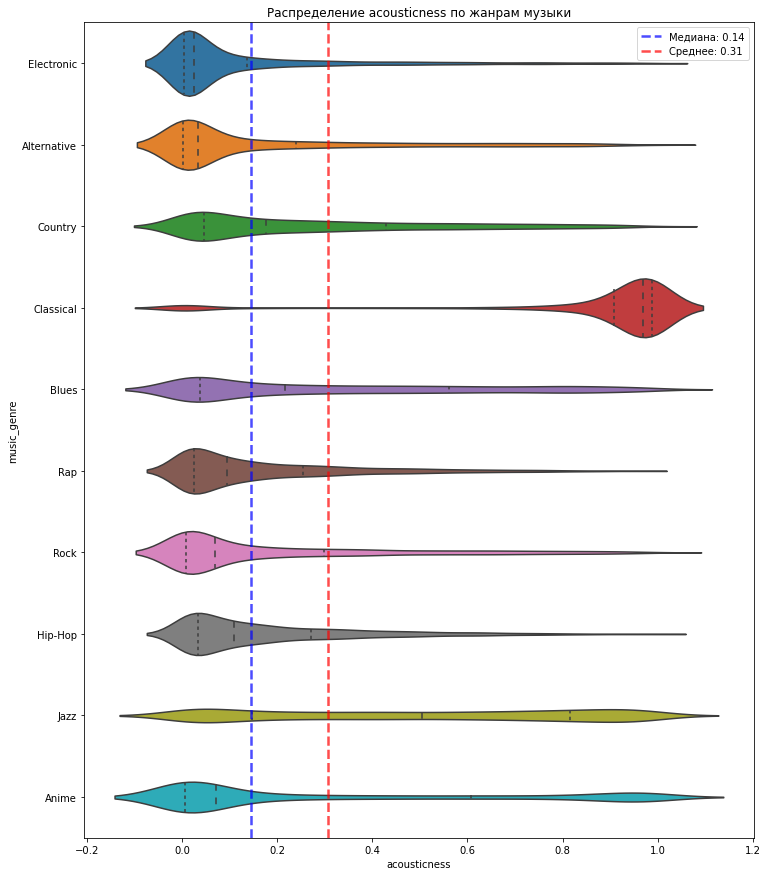

In [150]:
descriptive_stats_and_plot(train, 'acousticness')

* В целом, выделяется только значения в жанре **Classical**, они смещают медиану со средним и немного "ломают восприятие";
* Построим график без этого жанра.

'Описательная статистика для acousticness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",0.16,0.24,0.00,0.00,0.03,0.24,0.98
Anime,"3,694.00",0.29,0.37,0.00,0.01,0.07,0.61,1.00
Blues,"3,671.00",0.32,0.31,0.00,0.04,0.22,0.56,0.99
Country,"3,694.00",0.27,0.26,0.00,0.05,0.18,0.43,0.98
Electronic,"3,732.00",0.12,0.20,0.00,0.00,0.03,0.14,0.98
Hip-Hop,"3,626.00",0.18,0.19,0.00,0.03,0.11,0.27,0.98
Jazz,"3,691.00",0.49,0.34,0.00,0.15,0.50,0.82,1.00
Rap,"3,662.00",0.17,0.19,0.00,0.02,0.09,0.26,0.94
Rock,"3,692.00",0.19,0.25,0.00,0.01,0.07,0.30,0.99


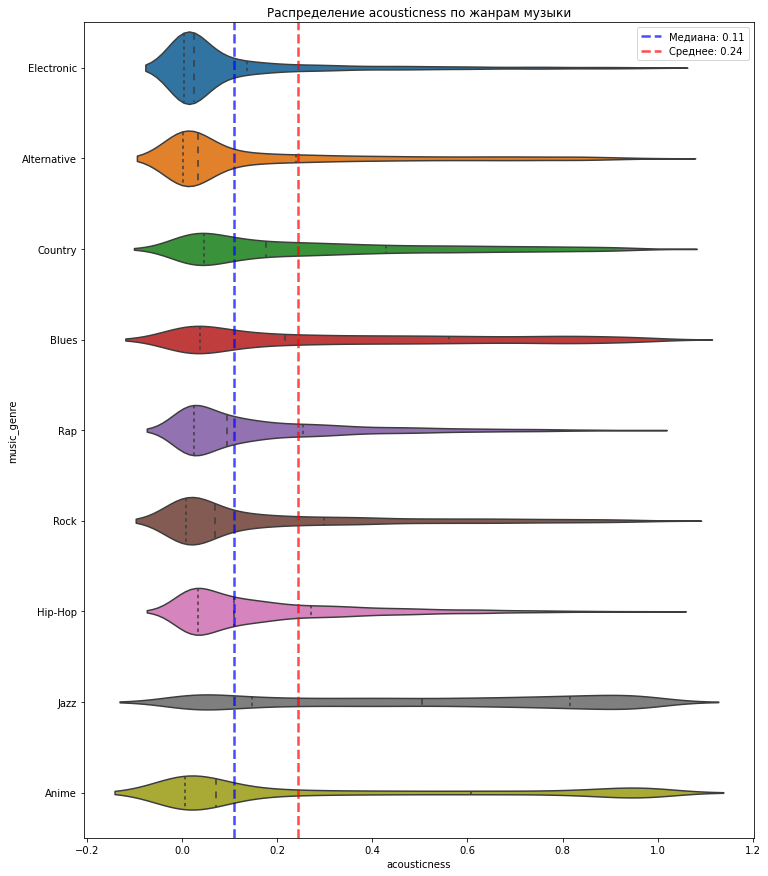

In [151]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'acousticness')

* Числовые метрики сместились влево.
* Критических выбросов или ошибочных значений не обнаружено.

### Столбец `danceability` 

'Описательная статистика для danceability:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",0.54,0.15,0.13,0.44,0.54,0.64,0.97
Anime,"3,694.00",0.47,0.15,0.06,0.39,0.49,0.57,0.91
Blues,"3,671.00",0.53,0.14,0.12,0.43,0.53,0.63,0.97
Classical,"3,706.00",0.31,0.13,0.06,0.20,0.30,0.40,0.78
Country,"3,694.00",0.58,0.11,0.20,0.51,0.58,0.64,0.92
Electronic,"3,732.00",0.62,0.14,0.08,0.54,0.63,0.72,0.98
Hip-Hop,"3,626.00",0.72,0.13,0.27,0.65,0.73,0.81,0.98
Jazz,"3,691.00",0.58,0.16,0.06,0.48,0.60,0.70,0.97
Rap,"3,662.00",0.70,0.14,0.20,0.61,0.71,0.80,0.97


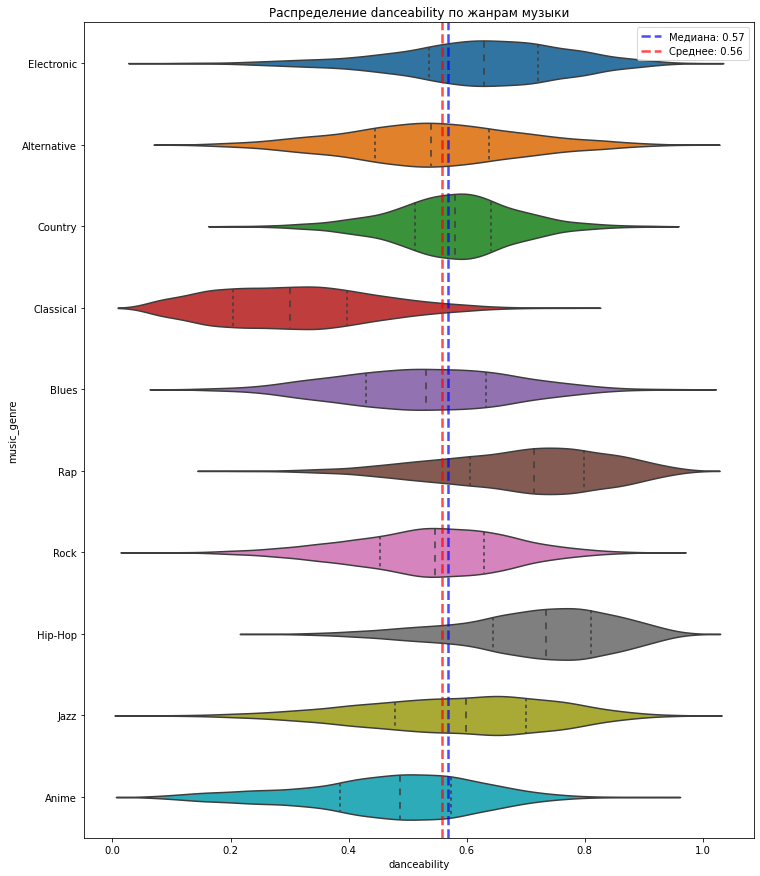

In [152]:
descriptive_stats_and_plot(train, 'danceability')

* Аномалии не выявлены, оставим столбец как есть.

### Столбец duration_ms (#section3_2)

'Описательная статистика для duration_ms:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00","209,997.80","91,183.27",-1.00,"186,165.25","219,853.00","255,390.25","656,493.00"
Anime,"3,694.00","209,951.94","106,637.10",-1.00,"146,399.75","230,205.50","273,956.75","1,295,600.00"
Blues,"3,671.00","227,962.20","134,576.39",-1.00,"171,460.00","220,147.00","278,580.00","2,019,293.00"
Classical,"3,706.00","277,926.54","222,367.86",-1.00,"147,566.00","239,926.50","365,060.25","3,195,440.00"
Country,"3,694.00","196,992.34","76,162.90",-1.00,"180,723.25","208,100.00","234,160.00","599,315.00"
Electronic,"3,732.00","244,535.92","172,265.82",-1.00,"192,167.00","236,800.00","297,859.75","4,830,606.00"
Hip-Hop,"3,626.00","199,328.74","86,761.89",-1.00,"167,836.50","209,746.50","248,857.00","723,573.00"
Jazz,"3,691.00","237,963.68","129,139.59",-1.00,"172,246.50","237,397.00","303,746.50","1,237,960.00"
Rap,"3,662.00","195,192.89","86,086.91",-1.00,"168,180.00","207,036.00","243,746.25","579,293.00"


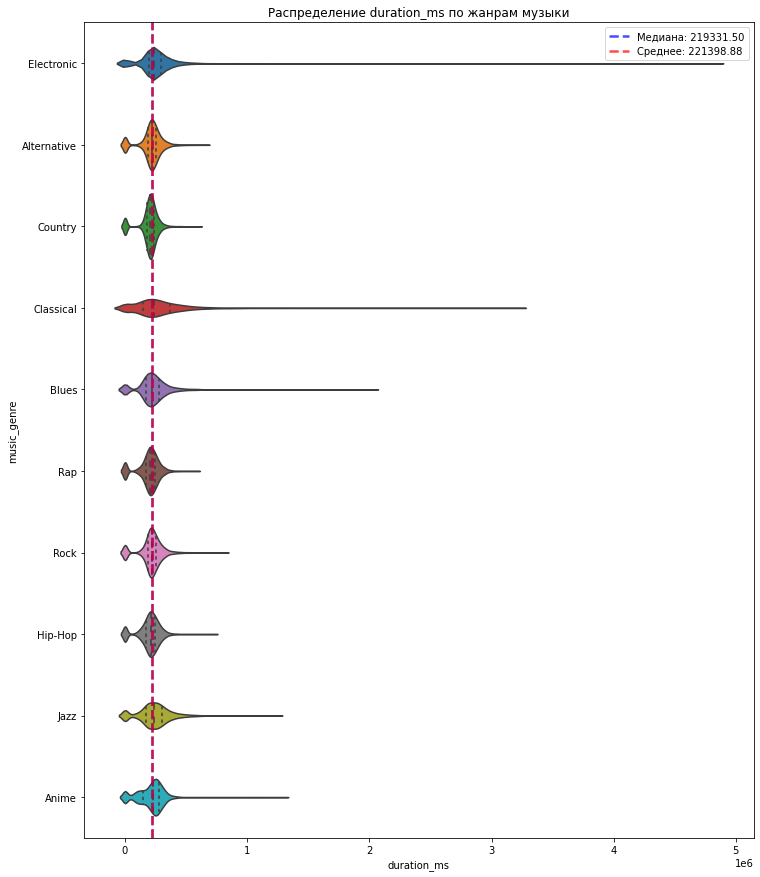

In [153]:
descriptive_stats_and_plot(train, 'duration_ms')

* Столбец содержит целочисленные значения, поменяем тип на int.
* В столбце несколько проблем:
    * Наличие выбросов искажающих общую картину средней длительности трека;
    * Наличие отрицательных значений длительности трека;
    * Неправильный тип столбца.


Отрицательные значения `duration_ms`
* Отрицательные значения в этом столбце - по сути, неявные пропуски. Поскольку, все отрицательные значания равны **-1**, что делает иъ схожими.
* Возможно ошибка вызвана техническим сбоем или человеческим фактором.

In [154]:
train['duration_ms'].replace(-1, np.nan, inplace=True)
print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 3637


In [155]:
fill_na_with_genre_median(train, 'duration_ms')

print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 0


Исправим тип переменной

In [156]:
train['duration_ms'] = train['duration_ms'].astype(int)
print(train['duration_ms'].dtypes)

int32


Исправим длительность

'Описательная статистика для duration_ms:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00","233,020.95","57,561.91","24,000.00","201,355.00","225,863.00","255,390.25","656,493.00"
Anime,"3,694.00","231,514.24","81,946.60","30,515.00","191,189.50","238,633.00","273,956.75","1,000,000.00"
Blues,"3,671.00","249,577.83","101,340.38","30,097.00","190,813.50","228,813.00","278,580.00","1,000,000.00"
Classical,"3,706.00","301,296.66","178,873.39","16,316.00","188,028.25","261,423.00","365,060.25","1,000,000.00"
Country,"3,694.00","216,788.38","42,478.66","78,187.00","191,610.00","211,960.00","234,160.00","599,315.00"
Electronic,"3,732.00","265,114.35","94,412.22","34,059.00","210,032.25","245,499.00","297,859.75","1,000,000.00"
Hip-Hop,"3,626.00","219,970.45","57,651.77","33,093.00","187,154.25","215,696.00","248,857.00","723,573.00"
Jazz,"3,691.00","262,378.42","101,660.67","19,693.00","197,006.50","249,353.00","303,746.50","1,000,000.00"
Rap,"3,662.00","218,042.26","53,453.64","59,118.00","187,751.00","214,000.00","243,746.25","579,293.00"


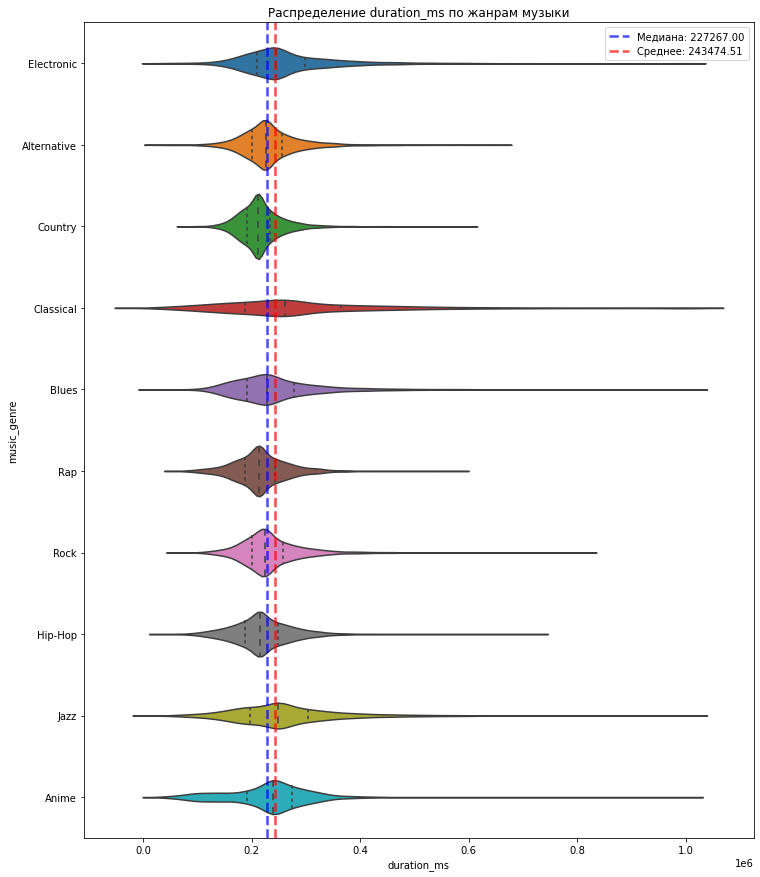

In [165]:
train.loc[train['duration_ms'] > 1000000, 'duration_ms'] = 1000000
descriptive_stats_and_plot(train, 'duration_ms')

### Столбец `energy` (#section3_4)

'Описательная статистика для energy:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",0.71,0.21,0.05,0.56,0.75,0.89,1.00
Anime,"3,694.00",0.66,0.30,0.00,0.41,0.77,0.93,1.00
Blues,"3,671.00",0.61,0.23,0.01,0.45,0.63,0.80,1.00
Classical,"3,706.00",0.18,0.22,0.00,0.04,0.10,0.20,0.99
Country,"3,694.00",0.64,0.20,0.02,0.50,0.67,0.80,0.98
Electronic,"3,732.00",0.74,0.19,0.02,0.61,0.78,0.90,1.00
Hip-Hop,"3,626.00",0.64,0.15,0.10,0.54,0.65,0.75,0.99
Jazz,"3,691.00",0.48,0.24,0.00,0.29,0.48,0.66,1.00
Rap,"3,662.00",0.65,0.16,0.08,0.54,0.65,0.76,1.00


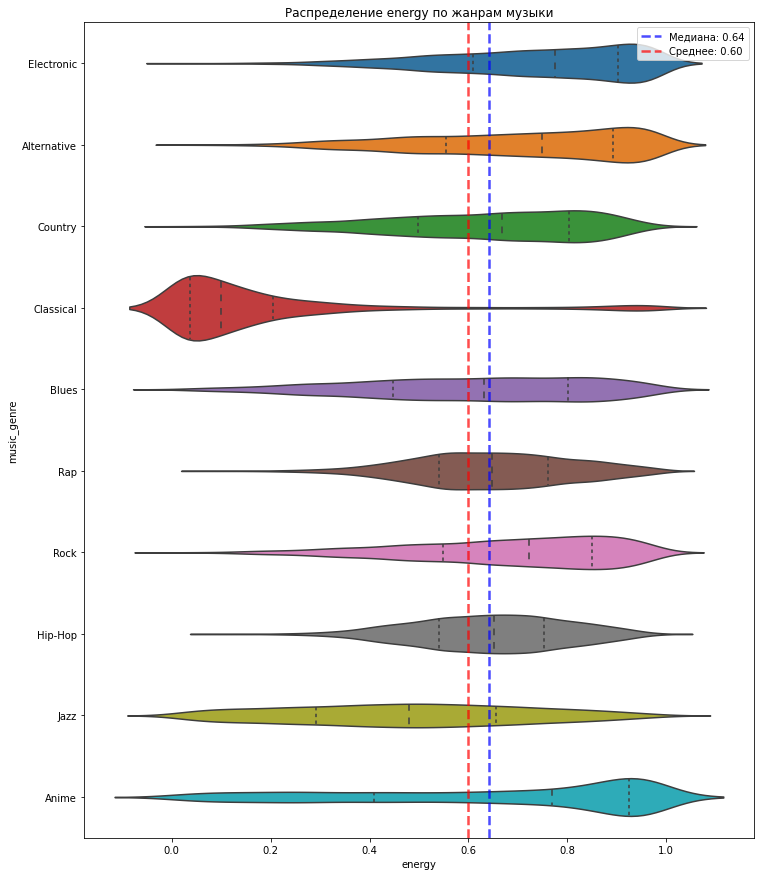

In [157]:
descriptive_stats_and_plot(train, 'energy')

* Аномалий в данных не обнаружено;
* Как всегда выделяется жанр **Classical** центр распределения смещено сильно влево отностельно средних значений;
* Видент тренд зависимости `energy` для каждого жанра музыки.

### Столбец `instrumentalness` (#section3_4)

'Описательная статистика для instrumentalness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",0.06,0.17,0.00,0.00,0.00,0.01,0.94
Anime,"3,694.00",0.28,0.39,0.00,0.00,0.00,0.78,0.99
Blues,"3,671.00",0.09,0.22,0.00,0.00,0.00,0.03,0.97
Classical,"3,706.00",0.60,0.38,0.00,0.15,0.83,0.91,0.99
Country,"3,694.00",0.01,0.04,0.00,0.00,0.00,0.00,0.78
Electronic,"3,732.00",0.35,0.36,0.00,0.00,0.20,0.76,0.99
Hip-Hop,"3,626.00",0.01,0.07,0.00,0.00,0.00,0.00,0.91
Jazz,"3,691.00",0.35,0.38,0.00,0.00,0.12,0.80,0.98
Rap,"3,662.00",0.01,0.06,0.00,0.00,0.00,0.00,0.92


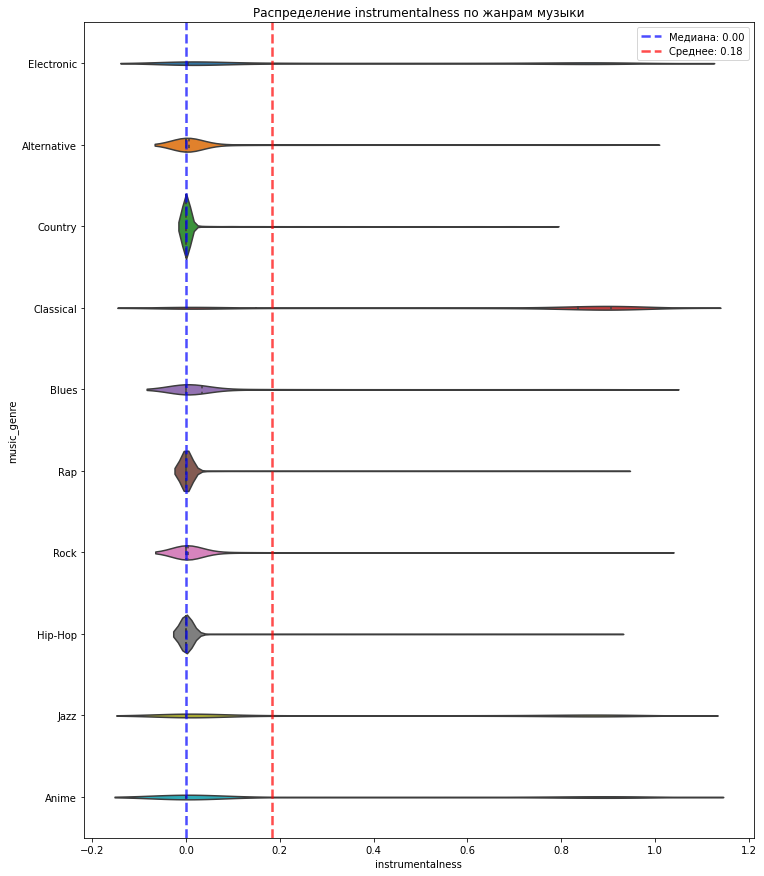

In [158]:
descriptive_stats_and_plot(train, 'instrumentalness')

'Описательная статистика для instrumentalness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00",0.05,0.14,0.00,0.00,0.00,0.01,0.60
Anime,"3,694.00",0.21,0.27,0.00,0.00,0.00,0.60,0.60
Blues,"3,671.00",0.08,0.18,0.00,0.00,0.00,0.03,0.60
Classical,"3,706.00",0.43,0.25,0.00,0.15,0.60,0.60,0.60
Country,"3,694.00",0.01,0.04,0.00,0.00,0.00,0.00,0.60
Electronic,"3,732.00",0.28,0.27,0.00,0.00,0.20,0.60,0.60
Hip-Hop,"3,626.00",0.01,0.06,0.00,0.00,0.00,0.00,0.60
Jazz,"3,691.00",0.27,0.28,0.00,0.00,0.12,0.60,0.60
Rap,"3,662.00",0.01,0.05,0.00,0.00,0.00,0.00,0.60


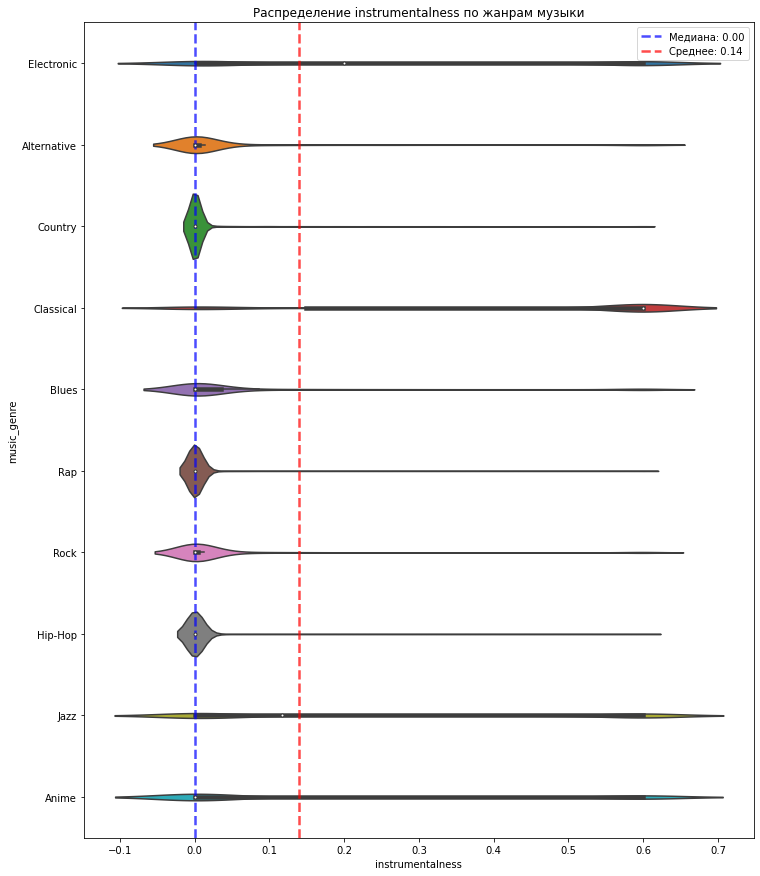

In [162]:
train.loc[train['instrumentalness'] > 0.6, 'instrumentalness'] = 0.6
descriptive_stats_and_plot(train, 'instrumentalness')

### Столбецliveness](#section3_5)
### Столбец loudness](#section3_6)
### Столбецspeechiness](#section3_7)
### Столбец tempo](#section3_8)
### Столбец valence](#section3_9)
### Столбец popularity](#section3_10)

'Описательная статистика для duration_ms:\n'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,620.00","209,997.80","91,183.27",-1.00,"186,165.25","219,853.00","255,390.25","656,493.00"
Anime,"3,694.00","209,951.94","106,637.10",-1.00,"146,399.75","230,205.50","273,956.75","1,295,600.00"
Blues,"3,671.00","227,962.20","134,576.39",-1.00,"171,460.00","220,147.00","278,580.00","2,019,293.00"
Classical,"3,706.00","277,926.54","222,367.86",-1.00,"147,566.00","239,926.50","365,060.25","3,195,440.00"
Country,"3,694.00","196,992.34","76,162.90",-1.00,"180,723.25","208,100.00","234,160.00","599,315.00"
Electronic,"3,732.00","244,535.92","172,265.82",-1.00,"192,167.00","236,800.00","297,859.75","4,830,606.00"
Hip-Hop,"3,626.00","199,328.74","86,761.89",-1.00,"167,836.50","209,746.50","248,857.00","723,573.00"
Jazz,"3,691.00","237,963.68","129,139.59",-1.00,"172,246.50","237,397.00","303,746.50","1,237,960.00"
Rap,"3,662.00","195,192.89","86,086.91",-1.00,"168,180.00","207,036.00","243,746.25","579,293.00"


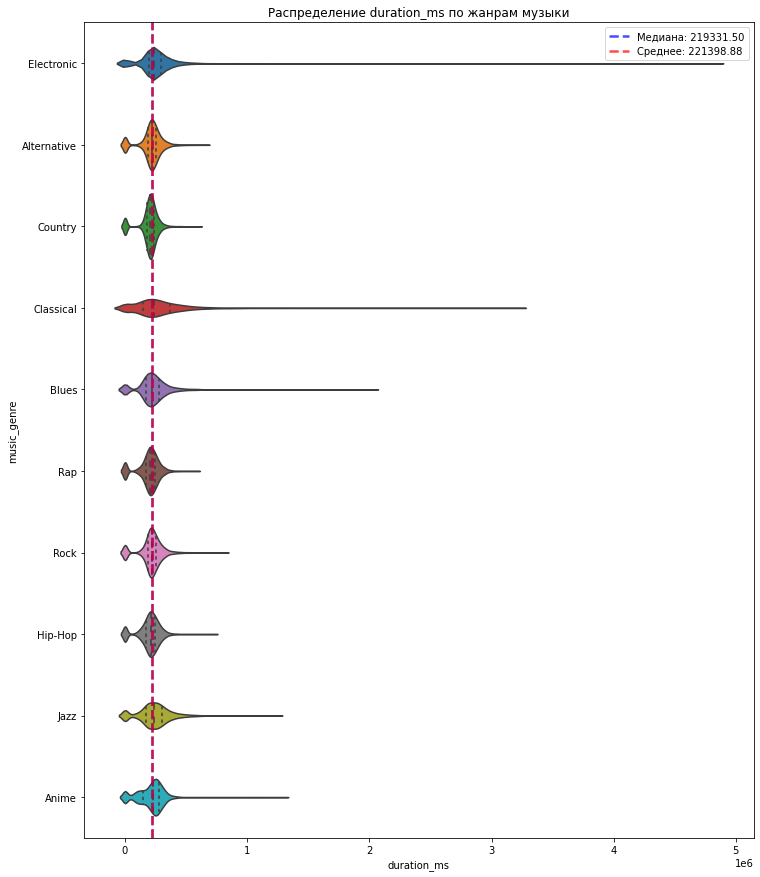

In [46]:
descriptive_stats_and_plot(train, 'duration_ms')

In [ ]:
plt.figure(figsize=(12, 15))
sns.violinplot(x='danceability', y='music_genre', data=train,split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Зависимость danceability от жанра музыки')
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.show()

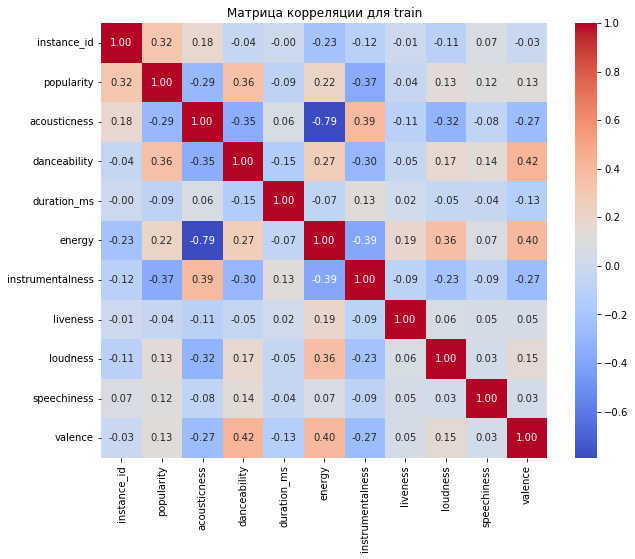

In [26]:
corr_matrix_train = train.corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для train")
plt.show()


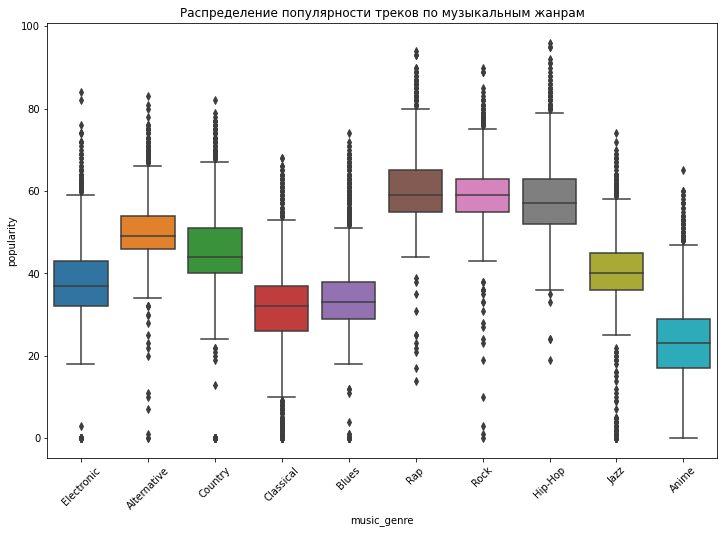

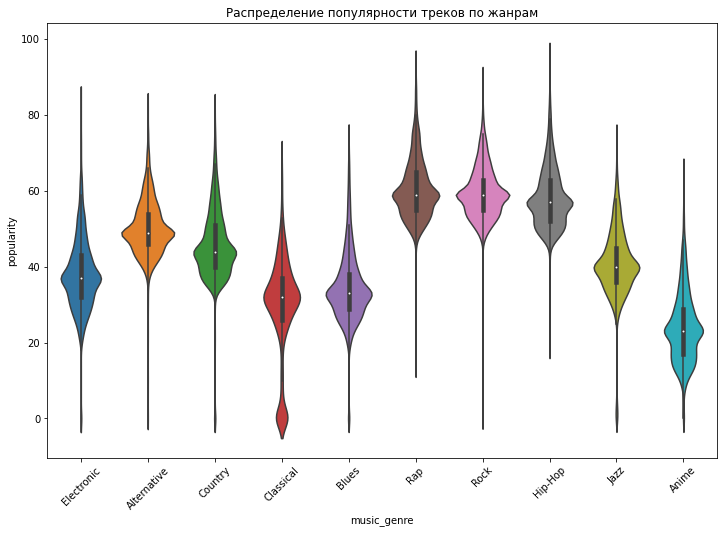

In [27]:
# Удаление строк с пропусками в столбце 'popularity'
train_clean = train.dropna(subset=['popularity'])

# Создание boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по музыкальным жанрам')
plt.show()

# Или создание violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по жанрам')
plt.show()